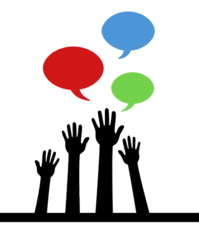

# The Sparks Foundation

# Graduate Rotational Internship Program (GRIP) April2021 Batch

## Data Science & Business Analytics 

### Prediction using Unsupervised ML

# By : Anshul Gupta

## Task - 2 : From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

#### Importing Necessary Libraries

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [24]:
%matplotlib inline

### Loading Dataset

In [4]:
data = pd.read_csv("Iris.csv")

In [5]:
data.set_index('Id',inplace=True)

In [6]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# Shape of dataset
data.shape

(150, 5)

In [8]:
# Statistics fact about data
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Plotting a pie chart to represent Distribution of flower species

<IPython.core.display.Javascript object>


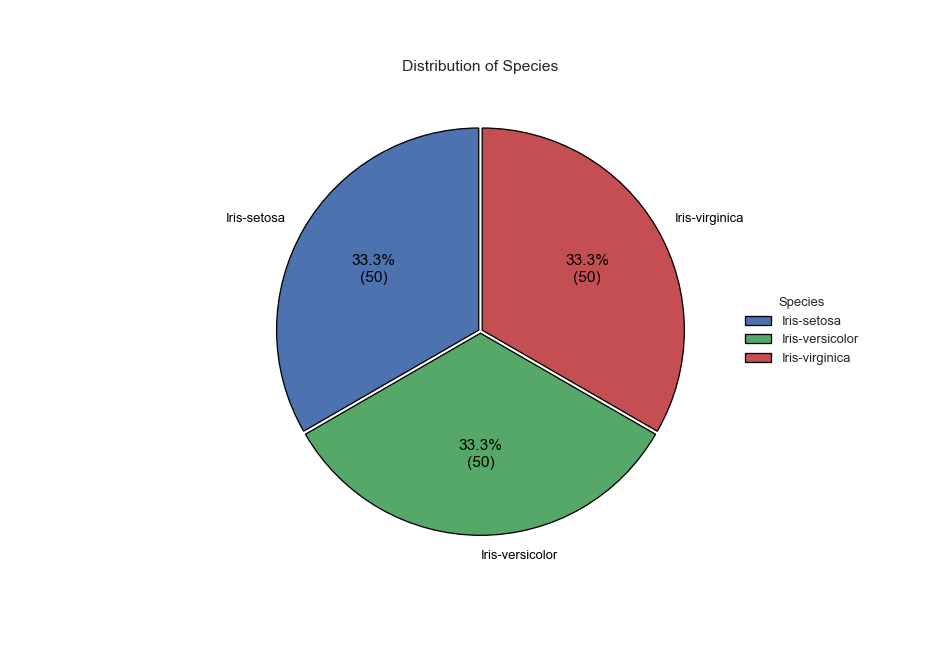

In [9]:
label = data['Species'].unique()
  
dat = data['Species'].value_counts()
  
# Creating explode data
explode = (0.01, 0.01, 0.01)

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "black" }
  
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
  
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(dat, 
                                  autopct = lambda pct: func(pct, dat),
                                  explode = explode, 
                                  labels = label,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
  
# Adding legend
ax.legend(wedges, label,
          title ="Species",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
  
plt.setp(autotexts, size = 12)
ax.set_title("Distribution of Species")
  
# show plot
plt.show()

### Boxplot between various features & detecting outliers

<IPython.core.display.Javascript object>


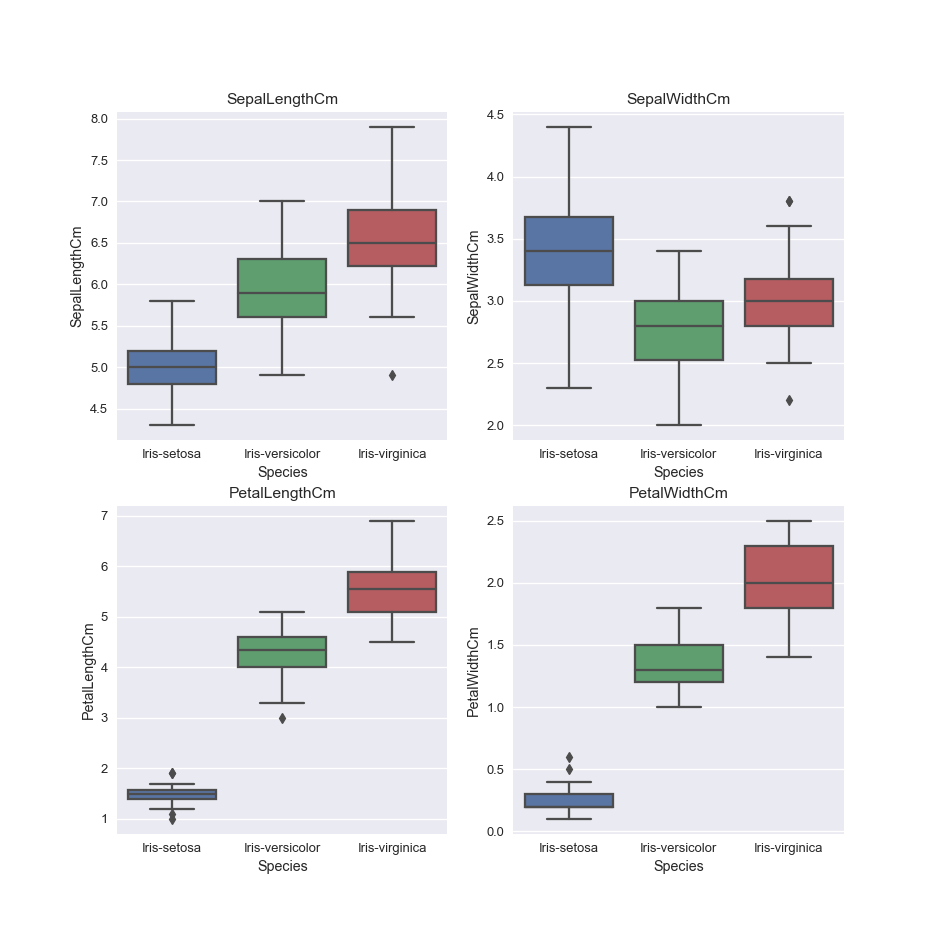

In [10]:
f = 1
plt.figure(figsize = (10,10))
for i in data.columns[:-1]:
    
    plt.subplot(2,2,f)
    
    sns.boxplot(x='Species',y=i,data=data)
    
    plt.title(i)
    
    f=f+1
    
plt.show()

### Pairplot - Pairwise Relationships b/w Features

<Figure size 432x432 with 0 Axes>

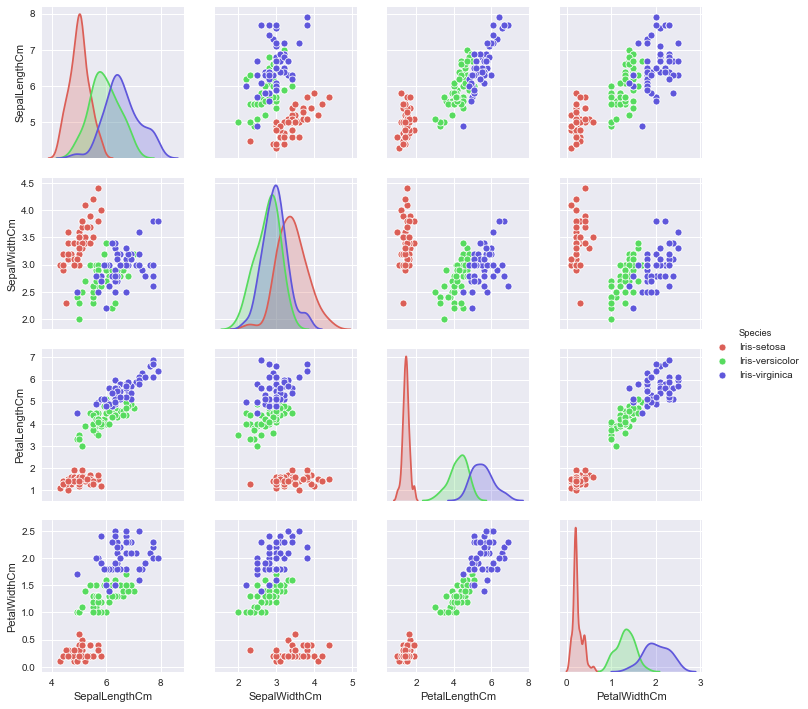

In [25]:
plt.figure(figsize=(6,6))
sns.pairplot(data,hue="Species",palette="hls")
plt.show()

### Checking for Null Value

In [12]:
data.isnull().any()

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

### K-means Clustering

In [13]:
from sklearn.cluster import KMeans

##### Finding Clusters using Petal Length & Petal Width

In [14]:
df = data[['PetalLengthCm','PetalWidthCm']]
df.head()

,PetalLengthCm,PetalWidthCm
Id,,
1,1.4,0.2
2,1.4,0.2
3,1.3,0.2
4,1.5,0.2
5,1.4,0.2


In [15]:
# Calculating sum of squared error for different K values
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)
    
print(sse)

[550.6434666666667, 86.40394533571003, 31.38775897435898, 19.49940089968511, 13.933308757908758, 11.084846431864282, 9.207570634920636, 7.683419523446297, 6.496659206692712]


### Plotting Elbow plot

<IPython.core.display.Javascript object>


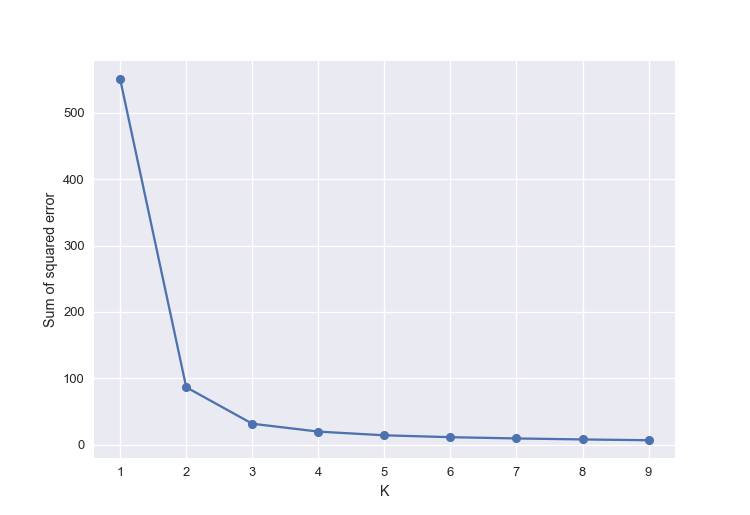

In [16]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse,marker='o')
plt.show()

## Hence from the given elbow plot it can be concluded that the optimum value for number of clusters turns out to be `3`

In [17]:
optimumK = 3
y_predicted = KMeans(n_clusters= optimumK)
y_predicted

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [18]:
pred = y_predicted.fit_predict(df[['PetalLengthCm','PetalWidthCm']])
print(pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 2]


In [19]:
df['Cluster'] = pred
df.head()

,PetalLengthCm,PetalWidthCm,Cluster
Id,,,
1,1.4,0.2,1
2,1.4,0.2,1
3,1.3,0.2,1
4,1.5,0.2,1
5,1.4,0.2,1


In [20]:
# Making different dataframes based on different clusters
df1 = df[df['Cluster'] == 0]
df2 = df[df['Cluster'] == 1]
df3 = df[df['Cluster'] == 2]

#### Clusters Plot using Petal Length & Petal Width

In [21]:
# Finding Clusters Center(Centroid)

centroid = y_predicted.cluster_centers_
print(centroid)

# Format (Xval,Yval)

[[4.26923077 1.34230769]
 [1.464      0.244     ]
 [5.59583333 2.0375    ]]


<IPython.core.display.Javascript object>


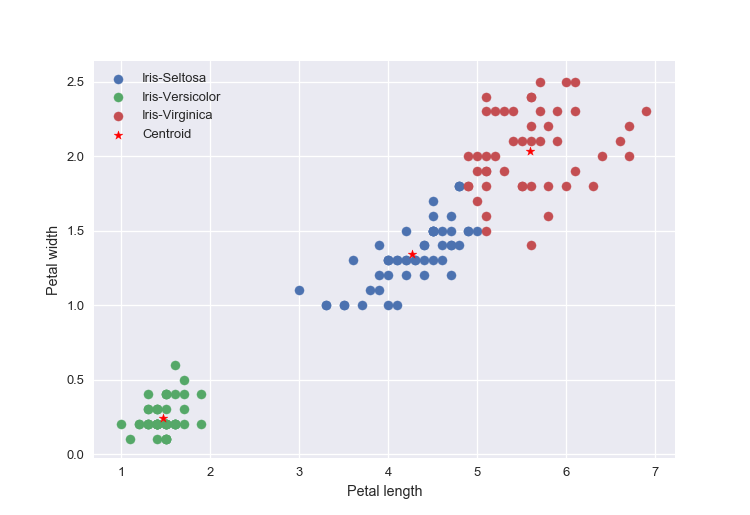

In [22]:
plt.scatter(df1.PetalLengthCm,df1.PetalWidthCm,label='Iris-Seltosa')
plt.scatter(df2.PetalLengthCm,df2.PetalWidthCm,label='Iris-Versicolor')
plt.scatter(df3.PetalLengthCm,df3.PetalWidthCm,label='Iris-Virginica')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.scatter(centroid[:,0],centroid[:,1],color='r',marker='*',label='Centroid')
plt.legend()
plt.show()

#### Thankyou! :)